In [63]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_digits
import seaborn as sns
import random

In [64]:
data = load_digits()

labels = pd.DataFrame(data["target"])
features = pd.DataFrame(data["data"])

In [65]:
features = np.array(features).astype("float32")
labels = np.array(labels).astype("int")


In [66]:
test_split = 0.3
train_data, test_data, train_labels, test_labels = train_test_split(features, labels, test_size=test_split, random_state=0) 

In [67]:
k_values = list(range(1, 6))
k_result = []

knn = cv2.ml.KNearest_create()
knn.train(train_data, cv2.ml.ROW_SAMPLE, train_labels)

for k in k_values:
    ret, result, neighbors, dist = knn.findNearest(test_data, k=k)
    k_result.append(result)

flattened = []
for res in k_result:
    flat = [item[0] for item in res]
    flattened.append(flat)


In [68]:
k_accuracies = []
conf_matrix = []

for res in k_result:
    label_names = list(range(10))
    conf_matrix.append(confusion_matrix(test_labels, res, labels=label_names))
    matches = test_labels == res
    k_accuracies.append(np.count_nonzero(matches)*100 / test_data.shape[0])

k_accuracies = dict(zip(k_values, k_accuracies))

In [69]:
sorted_kscores = sorted(k_accuracies.items(), key=lambda x: x[1], reverse=True)

k = sorted_kscores[0][0]
print(k)

1


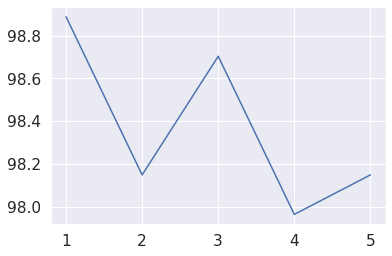

In [70]:
x = []
y = []
for item in k_accuracies.items():
    x.append(item[0])
    y.append(item[1])

plt.plot(x, y)
plt.show()

In [71]:
ret, result, neighbors, dist = knn.findNearest(test_data, k=k)

In [72]:
images = np.array(test_data)
images = np.reshape(images, newshape=(540, 8, 8))

In [73]:
rand_samples = [random.randint(0, test_data.shape[0]) for _ in range(5)]

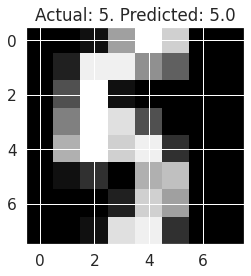

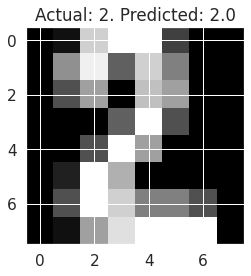

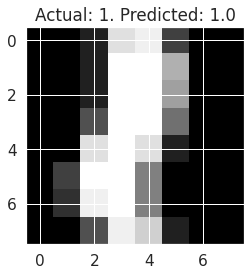

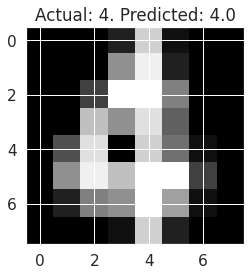

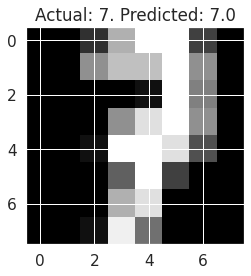

In [74]:
for sample in rand_samples:
    plt.imshow(images[sample, :], cmap="gray")
    plt.title(f"Actual: {test_labels[sample][0]}. Predicted: {result[sample][0]}")
    plt.show()
    

#### Final Model

In [76]:
knn_final = cv2.ml.KNearest_create()
knn_final.train(features, cv2.ml.ROW_SAMPLE, labels)

True

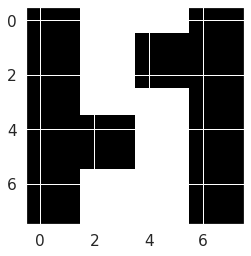

(8, 8)


In [77]:
to_predict = np.array([
            [0, 0, 255, 255, 255, 255, 0, 0],
            [0, 0, 255, 255, 0, 0, 0, 0],
            [0, 0, 255, 255, 0, 0, 0, 0],
            [0, 0, 255, 255, 255, 255, 0, 0],
            [0, 0, 0, 0, 255, 255, 0, 0],
            [0, 0, 0, 0, 255, 255, 0, 0],
            [0, 0, 255, 255, 255, 255, 0, 0],
            [0, 0, 255, 255, 255, 255, 0, 0]
            ])

prediction_label = 5
plt.imshow(to_predict, cmap="gray")
plt.show()
print(to_predict.shape)

In [78]:
flattened_predict = np.reshape(to_predict.flatten().astype("float32"), newshape=(1, 64))


In [79]:
ret, result, neighbors, dist = knn.findNearest(flattened_predict, k=k)

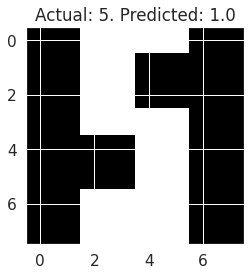

In [81]:

plt.imshow(to_predict, cmap="gray")
plt.title(f"Actual: {prediction_label}. Predicted: {result[0][0]}")
plt.show()